In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score, classification_report

from skimage.morphology import closing, disk, square
from tools import *
from plot import *
from preprocessing import *

In [2]:
indiana_img = np.load('../data/indianapines.npy')
indiana_labels = np.load('../data/indianapines_gt.npy')
salinas_img = np.load('../data/salinas.npy')
salinas_labels = np.load('../data/salinas_gt.npy')

In [3]:
# normalize radiance values to get reflectance values
indiana_img = indiana_img / indiana_img.max()
salinas_img = salinas_img / salinas_img.max()

### Anomaly Detection

Analysis of images using RX Anomaly Detector

In [4]:
anomaly_indiana = RX_anomaly_detector(indiana_img)
anomaly_salinas = RX_anomaly_detector(salinas_img)

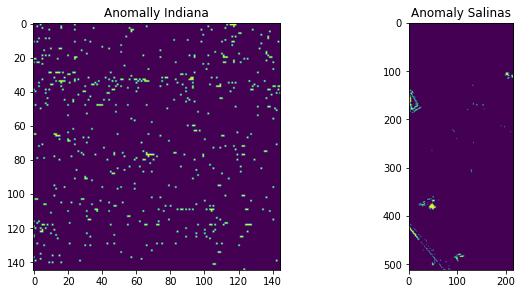

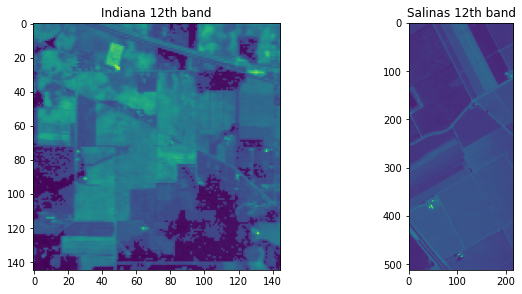

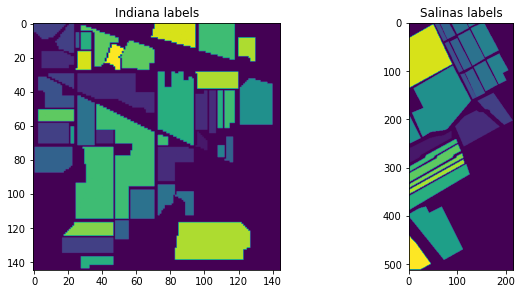

In [5]:
plot_two_figures(anomaly_indiana > 255000, anomaly_salinas >1200, 'Anomally Indiana', 'Anomaly Salinas')
plot_two_figures(indiana_img[:, :, 12], salinas_img[:, :, 12], 'Indiana 12th band', 'Salinas 12th band')
plot_two_figures(indiana_labels, salinas_labels, 'Indiana labels', 'Salinas labels')

### Classes analysis

Histogram of each classes

In [6]:
indiana_labels_usefull, _ = remove_unclassified_input(indiana_labels.flatten(), indiana_labels)
salinas_labels_usefull, _ = remove_unclassified_input(salinas_labels.flatten(), salinas_labels)

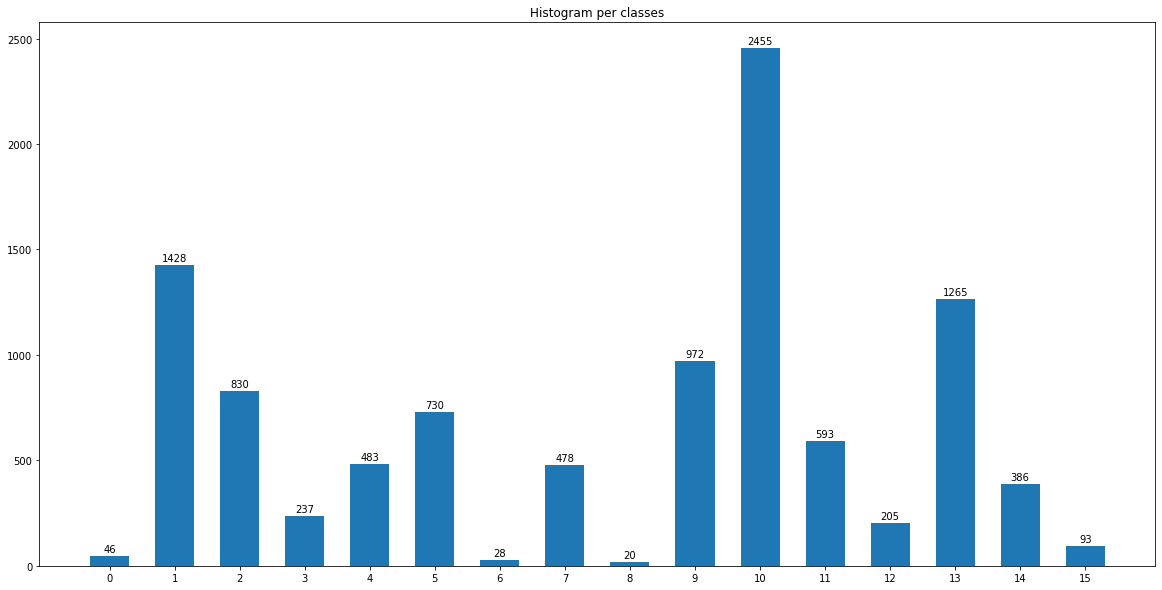

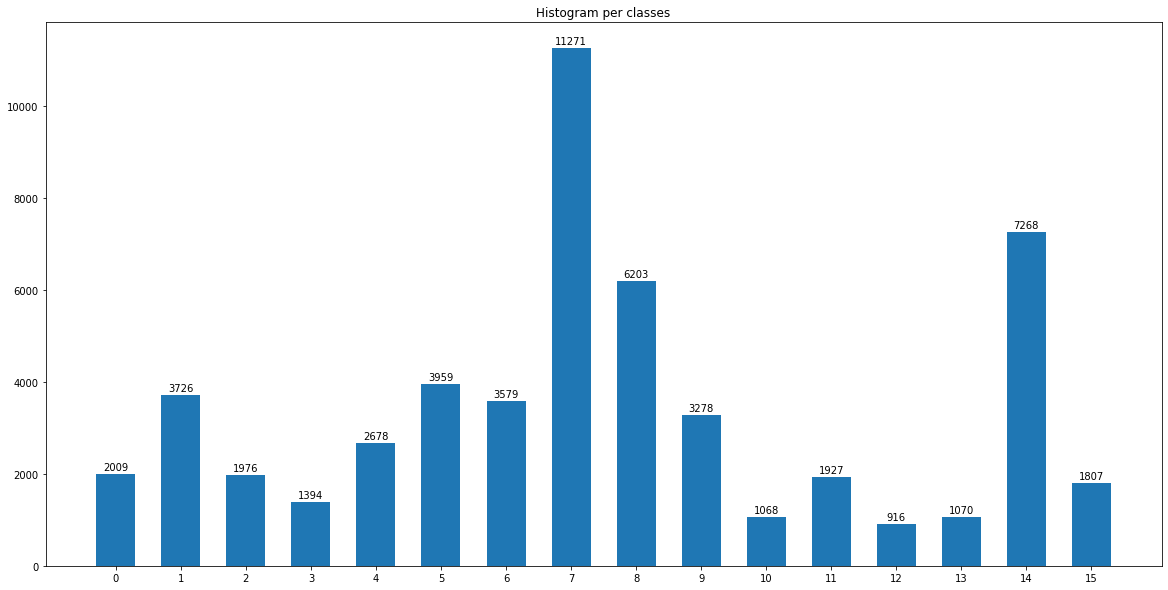

In [7]:
plot_histogram(indiana_labels_usefull-1, figsize=(20,10))
plot_histogram(salinas_labels_usefull-1, figsize=(20,10))

### Bands analysis

Plot different bands

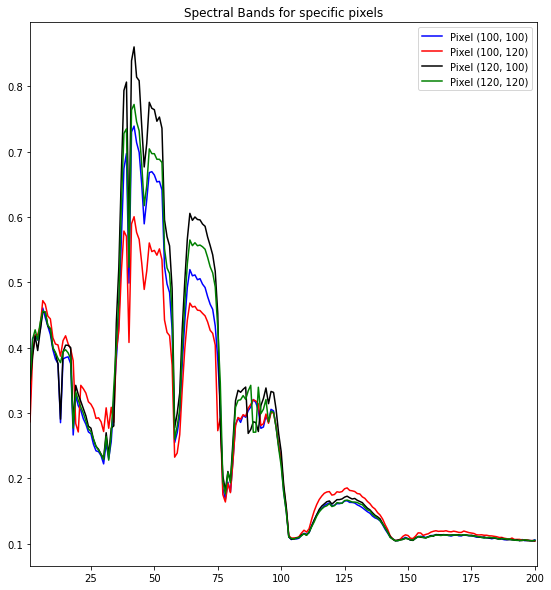

In [8]:
plot_bands(indiana_img)

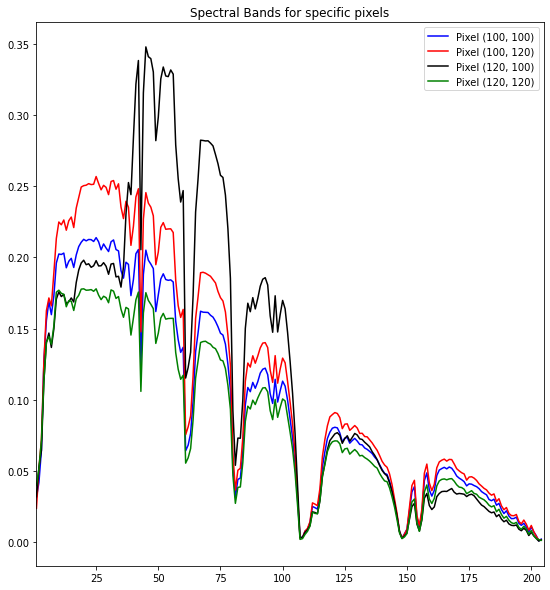

In [9]:
plot_bands(salinas_img)

Compute correlation between two successive bands

In [10]:
band=100

In [11]:
np.corrcoef(salinas_img[:,:,band].ravel(),salinas_img[:,:,band+1].ravel())

array([[1.        , 0.99601356],
       [0.99601356, 1.        ]])

In [12]:
np.corrcoef(indiana_img[:,:,band].ravel(),indiana_img[:,:,band+1].ravel())

array([[1.        , 0.98390018],
       [0.98390018, 1.        ]])

In [16]:
ranp.random.random_sample((500,200))

array([[0.62887352, 0.39517891, 0.6022735 , ..., 0.50056128, 0.18740391,
        0.68297204],
       [0.05286879, 0.40446579, 0.38987678, ..., 0.32547429, 0.89306341,
        0.24860755],
       [0.37486224, 0.09032832, 0.91466365, ..., 0.27738269, 0.73849985,
        0.92355864],
       ...,
       [0.46314328, 0.17013751, 0.74058766, ..., 0.3198063 , 0.84050976,
        0.15972223],
       [0.37816182, 0.63869493, 0.10797243, ..., 0.66243977, 0.79351322,
        0.99741303],
       [0.91604695, 0.58495974, 0.83331746, ..., 0.45295146, 0.39730411,
        0.2133094 ]])

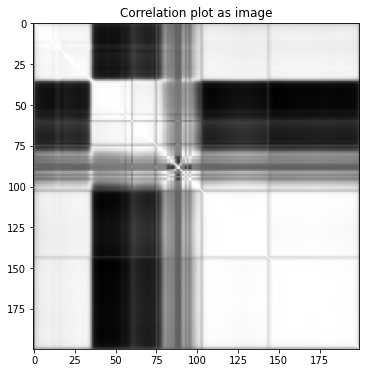

In [13]:
plot_correlation(indiana_img.reshape((-1, indiana_img.shape[-1])))

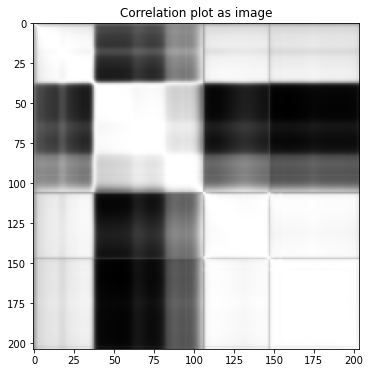

In [15]:
plot_correlation(salinas_img.reshape((-1, salinas_img.shape[-1])))